In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##  Relativistic rabbit ##

Consider the "classic" pursuit problem with a relativistic twist.
A dog is chasing a (relativistic) rabbit.  Its strategy is to always head
directly towards where it sees the rabbit to be.

Work in an inertial frame where the rabbit and dog's speed are constants,
$w$ and $v$ respectively, and let $t$ denote time measured in that frame.
Denote the rabbit's position as $\xi(t),\eta(t)$ and the dog's position as
$x(t),y(t)$ and let $\tau$ be the time at which the light received by the dog
is emitted by the rabbit (Note: that $\tau$ is not a proper time!!!).

It is straightforward to show
\begin{eqnarray}
  \dot{x}^2 + \dot{y}^2 &=& v^2 \\
  \dot{\xi}^2 + \dot{\eta}^2 &=& w^2 \\
  \left[x(t)-\xi(\tau)\right]^2 + \left[y(t)-\eta(\tau)\right]^2 &=&
    c^2(t-\tau)^2 \\
  \dot{x}(t)\left[y(t)-\eta(\tau)\right] &=&
  \dot{y}(t)\left[x(t)-\xi(\tau)\right]
\end{eqnarray}
The first two equations express the
conditions of constant speed, the last condition is the tangent condition
that the dog point towards the rabbit's apparent position and the third is the
light-travel time constraint between $\tau$ and $t$.

Specializing to the simplest case of "linear pursuit" with $\xi=a$,
$\eta=wt$ and $x<a$
\begin{equation}
  w\tau = y-y'(x-a) \qquad , \qquad
  c(t-\tau) = (a-x)\sqrt{1+y'^2}
\end{equation}
where the first identity comes from the tangent condition and the second from the time-lag equation.  You can make some progress analytically and derive an equation for $y'$ but this (unfortunately) needs to be solved numerically.  It's slightly easier to just got from the above equations, at least in terms of code-readability.

Below we shall set $c=1$:

In [2]:
def rabbit(t,w=0.8,a=1.0):
    """Returns the position of the rabbit at t."""
    return( (a,w*t) )
    #

In [3]:
def find_tau(x,y,t):
    """Numerically solve for tau given the dog's position and t."""
    # Use bisection -- a little clunky but fast enough for us.
    taulo,tauhi = -100.0,t+1.
    xi,eta = rabbit(taulo)
    flo    = (x-xi)**2+(y-eta)**2 - (t-taulo)**2
    xi,eta = rabbit(tauhi)
    fhi    = (x-xi)**2+(y-eta)**2 - (t-tauhi)**2
    while tauhi-taulo>1e-4:
        taumid = (taulo + tauhi)/2.0
        xi,eta = rabbit(taumid)
        fmid   = (x-xi)**2+(y-eta)**2 - (t-taumid)**2
        if flo*fmid<0:
            tauhi,fhi = taumid,fmid
        else:
            taulo,flo = taumid,fmid
    return(taumid)
    #

In [4]:
def derivs(x,y,t,dt,v=0.99):
    """Solve for the velocity of the dog."""
    tau    = find_tau(x,y,t)
    xi,eta = rabbit(tau)
    if np.abs(x-xi)<1e-6:
        # Motion is now vertical.
        dxdt = 0.0
        dydt = v
    else:
        # Get ratios for dy/dx, starting with dx=1.
        dydt = (y-eta)/(x-xi)
        # Now normalize to length v.
        scale      = v/np.sqrt(1.0+dydt**2)
        dxdt,dydt  = scale,dydt*scale
    return( (dxdt,dydt,tau) )
    #

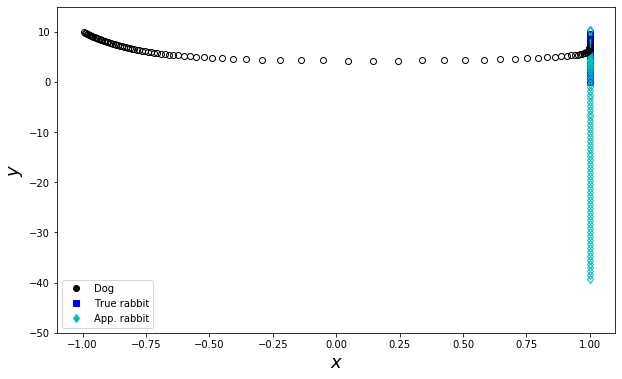

In [5]:
# Now plot a path.
fig,ax = plt.subplots(1,1,figsize=(10,6))
# We could solve the ODEs using one of the built-in solvers, but we're just
# going to use Euler's method for now and take really tiny steps.  Highly
# inefficient, but ...
t,dt,x,y  = 0.,1e-4,-1.0,10.0
xold,yold = x,y
#
while t<12:
    dxdt,dydt,tau = derivs(x,y,t,dt)
    # Update x and y.
    x += dxdt * dt
    y += dydt * dt
    t += dt
    if np.abs(10*t - np.rint(10*t))<9*dt:
        ax.plot([x],[y],'ko',mfc='None')
        eta,xi = rabbit(t)
        ax.plot([eta],[xi],'bs',mfc='None')
        eta,xi = rabbit(find_tau(x,y,t))
        ax.plot([eta],[xi],'cd',mfc='None')
        xold,yold = x,y
ax.plot([-5],[0],'ko',label='Dog')
ax.plot([-5],[0],'bs',label='True rabbit')
ax.plot([-5],[0],'cd',label='App. rabbit')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-50.,15.)
ax.set_xlabel(r'$x$',fontsize=18)
ax.set_ylabel(r'$y$',fontsize=18)
ax.legend()

Due to the light-travel-time issue the rabbit appears to the dog to be running at a variable speed.  If the dog starts at $x<a$ and above the rabbit it will run to the right and down, seeing the rabbit moving very quickly because of the light-travel time.  You can see this above with the cyan points starting way below the blue points (the blue points only start at $t=0$, but we imagine the rabbit has been running along $x=1$ even in the past so it was once at the first cyan point).  Note, eventually the dog will swing in behind the rabbit, which you can see more easily if you zoom in on the top-right of the plot.

The classical pursuit problem has an interesting history, with contributions to the mathematics going as far back as Newton. There was a lot of development in the 18th century, funded by various navies, that helped inspire developments in DEs. Prominent names associated with the problem are Bouguer and Boole.